In [1]:
from keras.datasets import imdb
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

Using TensorFlow backend.
/home/shahir/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/shahir/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [20]:

from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6243 - accuracy: 0.6926 - val_loss: 0.4494 - val_accuracy: 0.8595
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3830 - accuracy: 0.8930 - val_loss: 0.3322 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2606 - accuracy: 0.9247 - val_loss: 0.2887 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2007 - accuracy: 0.9406 - val_loss: 0.2825 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1653 - accuracy: 0.9496 - val_loss: 0.2839 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1328 - accuracy: 0.9612 - val_loss: 0.2883 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1095 - accuracy: 0.9685 - val_loss: 0.3028 - val_accuracy: 0.8824
Epoch 8/20
30

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

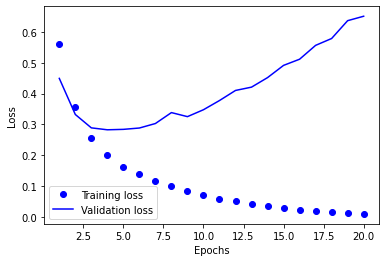

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

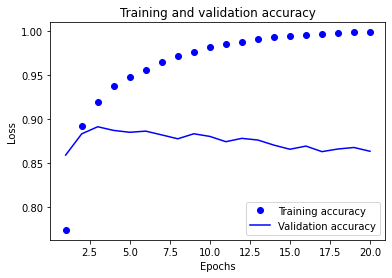

In [28]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
#with epoch 4
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/4
30/30 [==============================] - 1s 22ms/step - loss: 0.6009 - accuracy: 0.7084 - val_loss: 0.4178 - val_accuracy: 0.8669
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.3595 - accuracy: 0.8977 - val_loss: 0.3238 - val_accuracy: 0.8852
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2584 - accuracy: 0.9223 - val_loss: 0.3047 - val_accuracy: 0.8815
Epoch 4/4
30/30 [==============================] - 0s 10ms/step - loss: 0.1960 - accuracy: 0.9418 - val_loss: 0.2756 - val_accuracy: 0.8893


In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

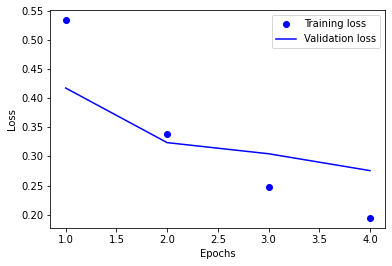

In [38]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 5)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

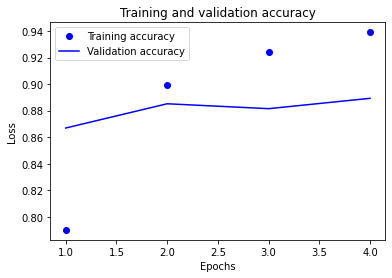

In [39]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 790us/step - loss: 0.2913 - accuracy: 0.8851


In [41]:
results

[0.2913140654563904, 0.8851199746131897]

In [43]:
#with three hidden layer
#model creation
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#model compilation
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
#model fit
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6090 - accuracy: 0.6949 - val_loss: 0.3959 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3307 - accuracy: 0.8989 - val_loss: 0.3064 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2223 - accuracy: 0.9298 - val_loss: 0.3017 - val_accuracy: 0.8805
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1728 - accuracy: 0.9453 - val_loss: 0.2793 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1301 - accuracy: 0.9628 - val_loss: 0.2857 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1036 - accuracy: 0.9710 - val_loss: 0.3006 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0863 - accuracy: 0.9761 - val_loss: 0.3761 - val_accuracy: 0.8693
Epoch 8/20
30

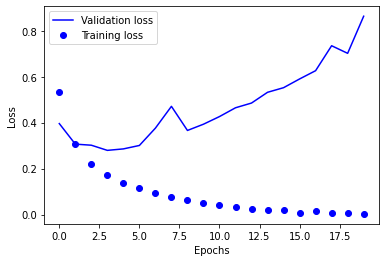

In [46]:
import matplotlib.pyplot as plt
history_dict = history.history
val_loss = history_dict['val_loss']
train_loss = history_dict['loss']
epochs = range(0, 20)
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

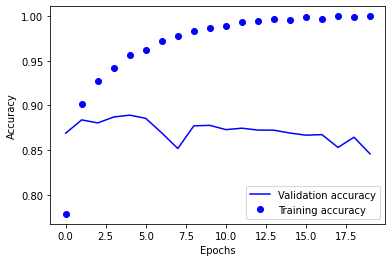

In [48]:
plt.clf()
val_acc = history_dict['val_accuracy']
acc = history_dict['accuracy']
epochs = range(0, 20)
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 828us/step - loss: 0.3846 - accuracy: 0.8546


[0.38460874557495117, 0.854640007019043]

In [71]:

model = Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/5
30/30 [==============================] - 1s 30ms/step - loss: 0.5577 - accuracy: 0.7090 - val_loss: 0.3313 - val_accuracy: 0.8587
Epoch 2/5
30/30 [==============================] - 1s 18ms/step - loss: 0.2257 - accuracy: 0.9116 - val_loss: 0.2764 - val_accuracy: 0.8880
Epoch 3/5
30/30 [==============================] - 1s 17ms/step - loss: 0.1654 - accuracy: 0.9381 - val_loss: 0.3138 - val_accuracy: 0.8825
Epoch 4/5
30/30 [==============================] - 1s 17ms/step - loss: 0.1192 - accuracy: 0.9578 - val_loss: 0.4043 - val_accuracy: 0.8572
Epoch 5/5
30/30 [==============================] - 0s 17ms/step - loss: 0.1051 - accuracy: 0.9603 - val_loss: 0.6749 - val_accuracy: 0.8185


In [72]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 1ms/step - loss: 0.7088 - accuracy: 0.8061


[0.7087957262992859, 0.8060799837112427]

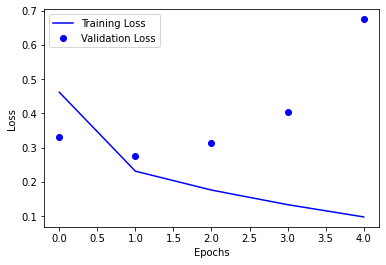

In [73]:
import matplotlib.pyplot as plt
history_dict = history.history
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
acc = history_dict['accuracy']
epochs = range(0, 5)
plt.plot(epochs, loss, 'b', label="Training Loss")
plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 810us/step - loss: 0.3846 - accuracy: 0.8546


[0.38460874557495117, 0.854640007019043]